# BUSINESS CASE

### Predict the total count of bikes given on rent per day.

Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 


Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

## Domain Analysis

* Here we have data of 2 years.
* Here we predict the count of bikes given on rent based on different conditions like instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.
* Here the cnt is our target variable

In [1]:
# import important libraries 
import pandas as pd  # used for load the data, manipulation of data,data cleaning & analysis
import numpy as np  # used for numerical function
import seaborn as sns  # use for data visualization
import matplotlib.pyplot as plt  # use for data visualization
import warnings  # use for ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data set
data = pd.read_csv('day.csv')
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [3]:
# load the data set
data = pd.read_csv('day.csv')
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [4]:
data.columns  # shows the features of dataset

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Features Information:

**instant** : it shows the index for every rows.\
**dteday** : The date of the observation.\
**season** : It shows the season in which the observation was made.\
**yr** : It shows the year of the observation.\
**mnth** : It shows the month of observation.\
**holiday** : It shows the whether the day is holiday.\
**weekday** : It shows the day of week.\
**workingday** : It shows that whether the day is working day.\
**weathersit** : It shows the weather situation.\
**temp** : It shows the temperature in celsius.\
**atemp** : It shows the feels like temperature in celsius.\
**hum** : It shows the humidity.\
**windspeed** : It shows the speed of wind.\
**casual** : It is show the non-registered users.\
**registered** : It is show the registered users.\
**cnt** : The total count of users.\

## Basic Checks

In [5]:
data.info()  # gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insights**
* Here we can not see any null values in any columns.
* Here we can see the total 731 rows and 16 columns in the dataset.
* Here we can see the total float datatype column is 4 and total int datatype column is 11.
* Here we can see the total storage of data is 91.5 kb.
* Here we can see the total object datatype column is 1.
     * Here we should change the dteday column datatype object to datetime64.

In [6]:
data.head() # showing the first 5 row

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
data.tail()  # showing the last 5 row

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [8]:
data.describe()  # describe the statistical information for continuous column

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

**Insights**
* Here we can not see any null values in any columns.
* Here we can see the max temp is 0.86 and min temp is 0.05 and the max windspeed is 0.50.
* Here we can see the min season is 1 and max season is 4.
* Here we can see the min to max weekday 0 to 6. Here we can see the weathersit min to max is 0 to 3.
* Here we can see the instant column have all unique value so this column is not important, we drop this column.

In [9]:
data.describe(include='O')  # describe the categorical columns

dteday
count          731
unique         731
top     2011-01-01
freq             1

**Insights**
* Here we can see that the date column should have datetime datatype. so we convert it in datetime datatype.

In [10]:
# import datetime
from datetime import datetime as dt
data['dteday'] = data['dteday'].astype('datetime64[ns]')  # convert the datatype object to datetime

In [11]:
data['dteday']

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

**In the dataset, we have year and month features, so we just need day. We take a day from the dteday column and make a new feature 'day' and drop the dteday column.**

In [12]:
data['day'] = pd.to_datetime(data.dteday).dt.day   #create a day column

In [13]:
data['day']

0       1
1       2
2       3
3       4
4       5
       ..
726    27
727    28
728    29
729    30
730    31
Name: day, Length: 731, dtype: int32

## EDA : Exploratory Data Analysis

 EDA is the process of analyzing and visualizing datasets.
* there are three type of EDA:
  1. Univariante Analysis
  2. Biavariante Analysis
  3. Multivariante Analysis

In [14]:
data.drop(['instant','dteday'],axis=1,inplace=True)  # drop the instant and dteday column
data

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1   0     1        0        6           0           2  0.344167   
1         1   0     1        0        0           0           2  0.363478   
2         1   0     1        0        1           1           1  0.196364   
3         1   0     1        0        2           1           1  0.200000   
4         1   0     1        0        3           1           1  0.226957   
..      ...  ..   ...      ...      ...         ...         ...       ...   
726       1   1    12        0        4           1           2  0.254167   
727       1   1    12        0        5           1           2  0.253333   
728       1   1    12        0        6           0           2  0.253333   
729       1   1    12        0        0           0           1  0.255833   
730       1   1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  day  
0    0.363625  0.805833   0.160446     331         654   985    1  
1    0.353739  0.696087   0.248539     131         670   801    2  
2    0.189405  0.437273   0.248309     120        1229  1349    3  
3    0.212122  0.590435   0.160296     108        1454  1562    4  
4    0.229270  0.436957   0.186900      82        1518  1600    5  
..        ...       ...        ...     ...         ...   ...  ...  
726  0.226642  0.652917   0.350133     247        1867  2114   27  
727  0.255046  0.590000   0.155471     644        2451  3095   28  
728  0.242400  0.752917   0.124383     159        1182  1341   29  
729  0.231700  0.483333   0.350754     364        1432  1796   30  
730  0.223487  0.577500   0.154846     439        2290  2729   31  

[731 rows x 15 columns]

In [15]:
con_col = data[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]  # define variable for continuous column

### 1. Univariante Analysis

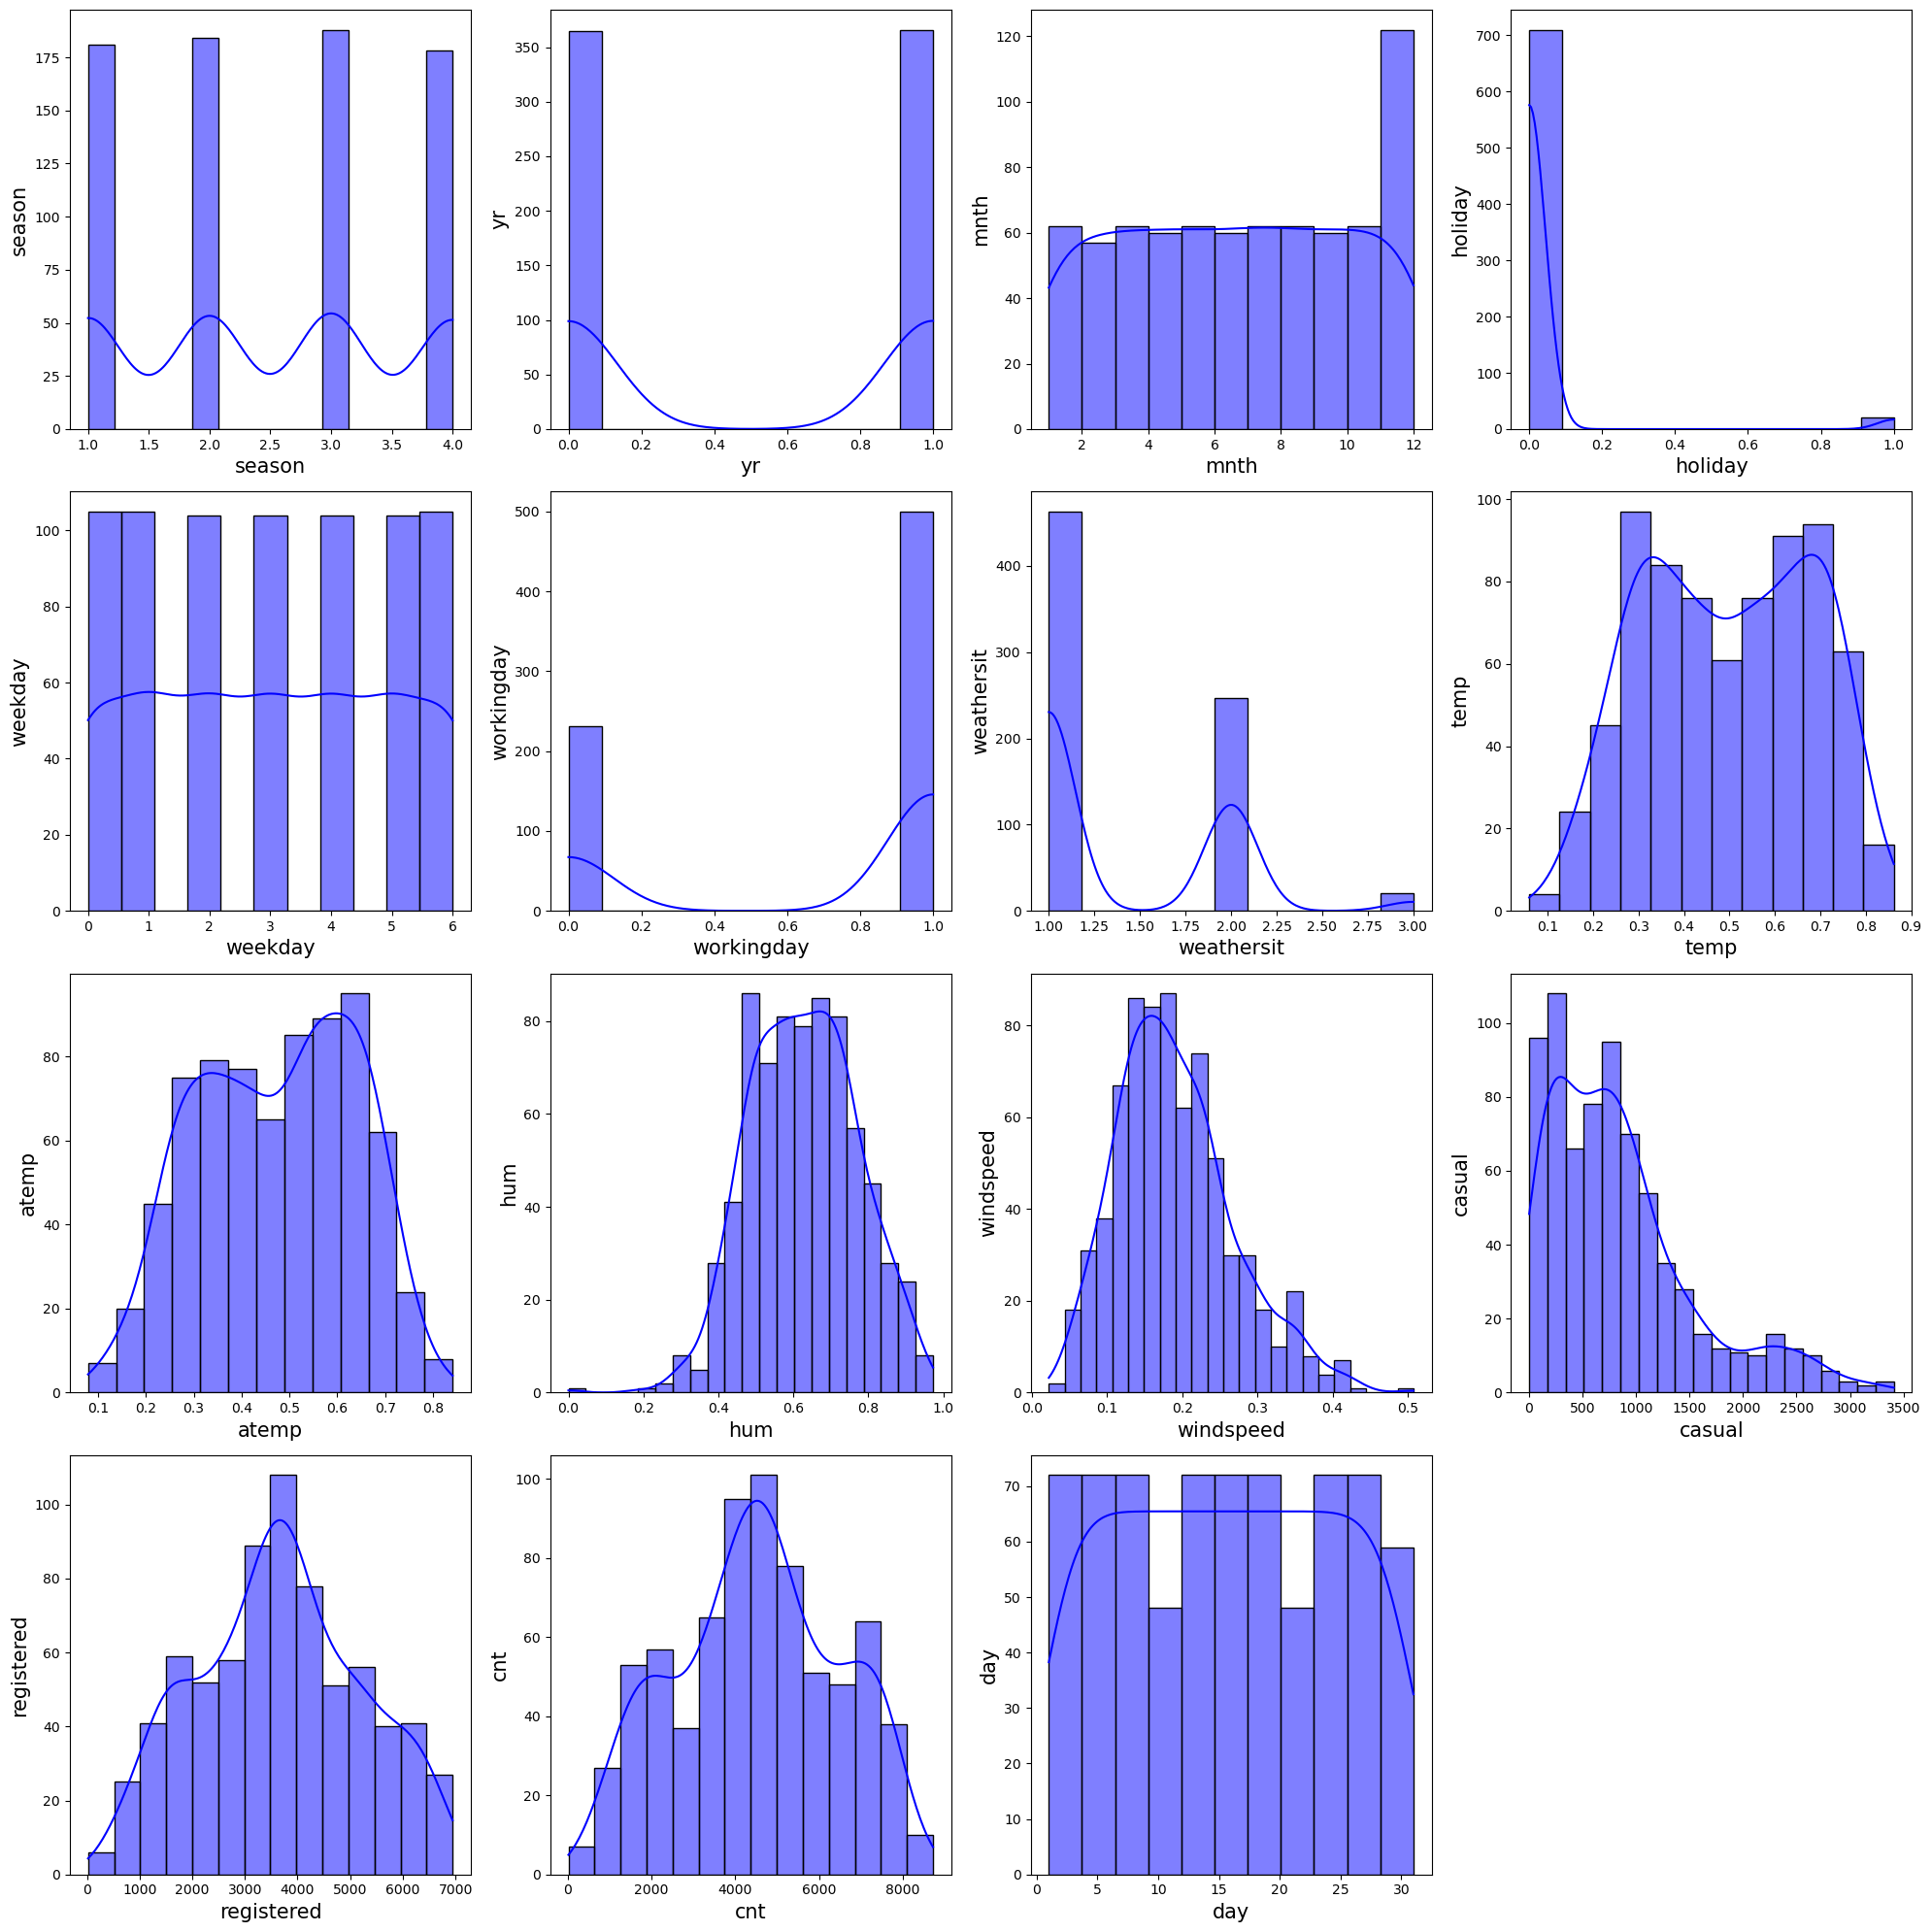

In [16]:
plt.figure(figsize=(20,20),facecolor='white')  # define the plot size
plt_num=1 
for i in data:  #define for loop
    if plt_num <= 15 :  # if condition
        plt.subplot(4,4,plt_num)  #assign the row and column
        sns.histplot(data[i],kde=True,color='b')  #create a histogram plot
        plt.xticks(fontsize=10)  # define the xticks size
        plt.yticks(fontsize=10)  # define the yticks size
        plt.xlabel(i,fontsize=15)  # assign the xlabel value
        plt.ylabel(i,fontsize=15)  # assign the xlabel value
        plt_num += 1  # increment of 1
plt.tight_layout() # use for show the data

**Insights**
* Here we are use histogram plot for in numerical column.
* Here we can see the normal distribution in two columns like hum and windspeed after not see any columns follow normal distribution.
* Here we can see that the casual column are right skewed.


### 2. Biavariante Analysis

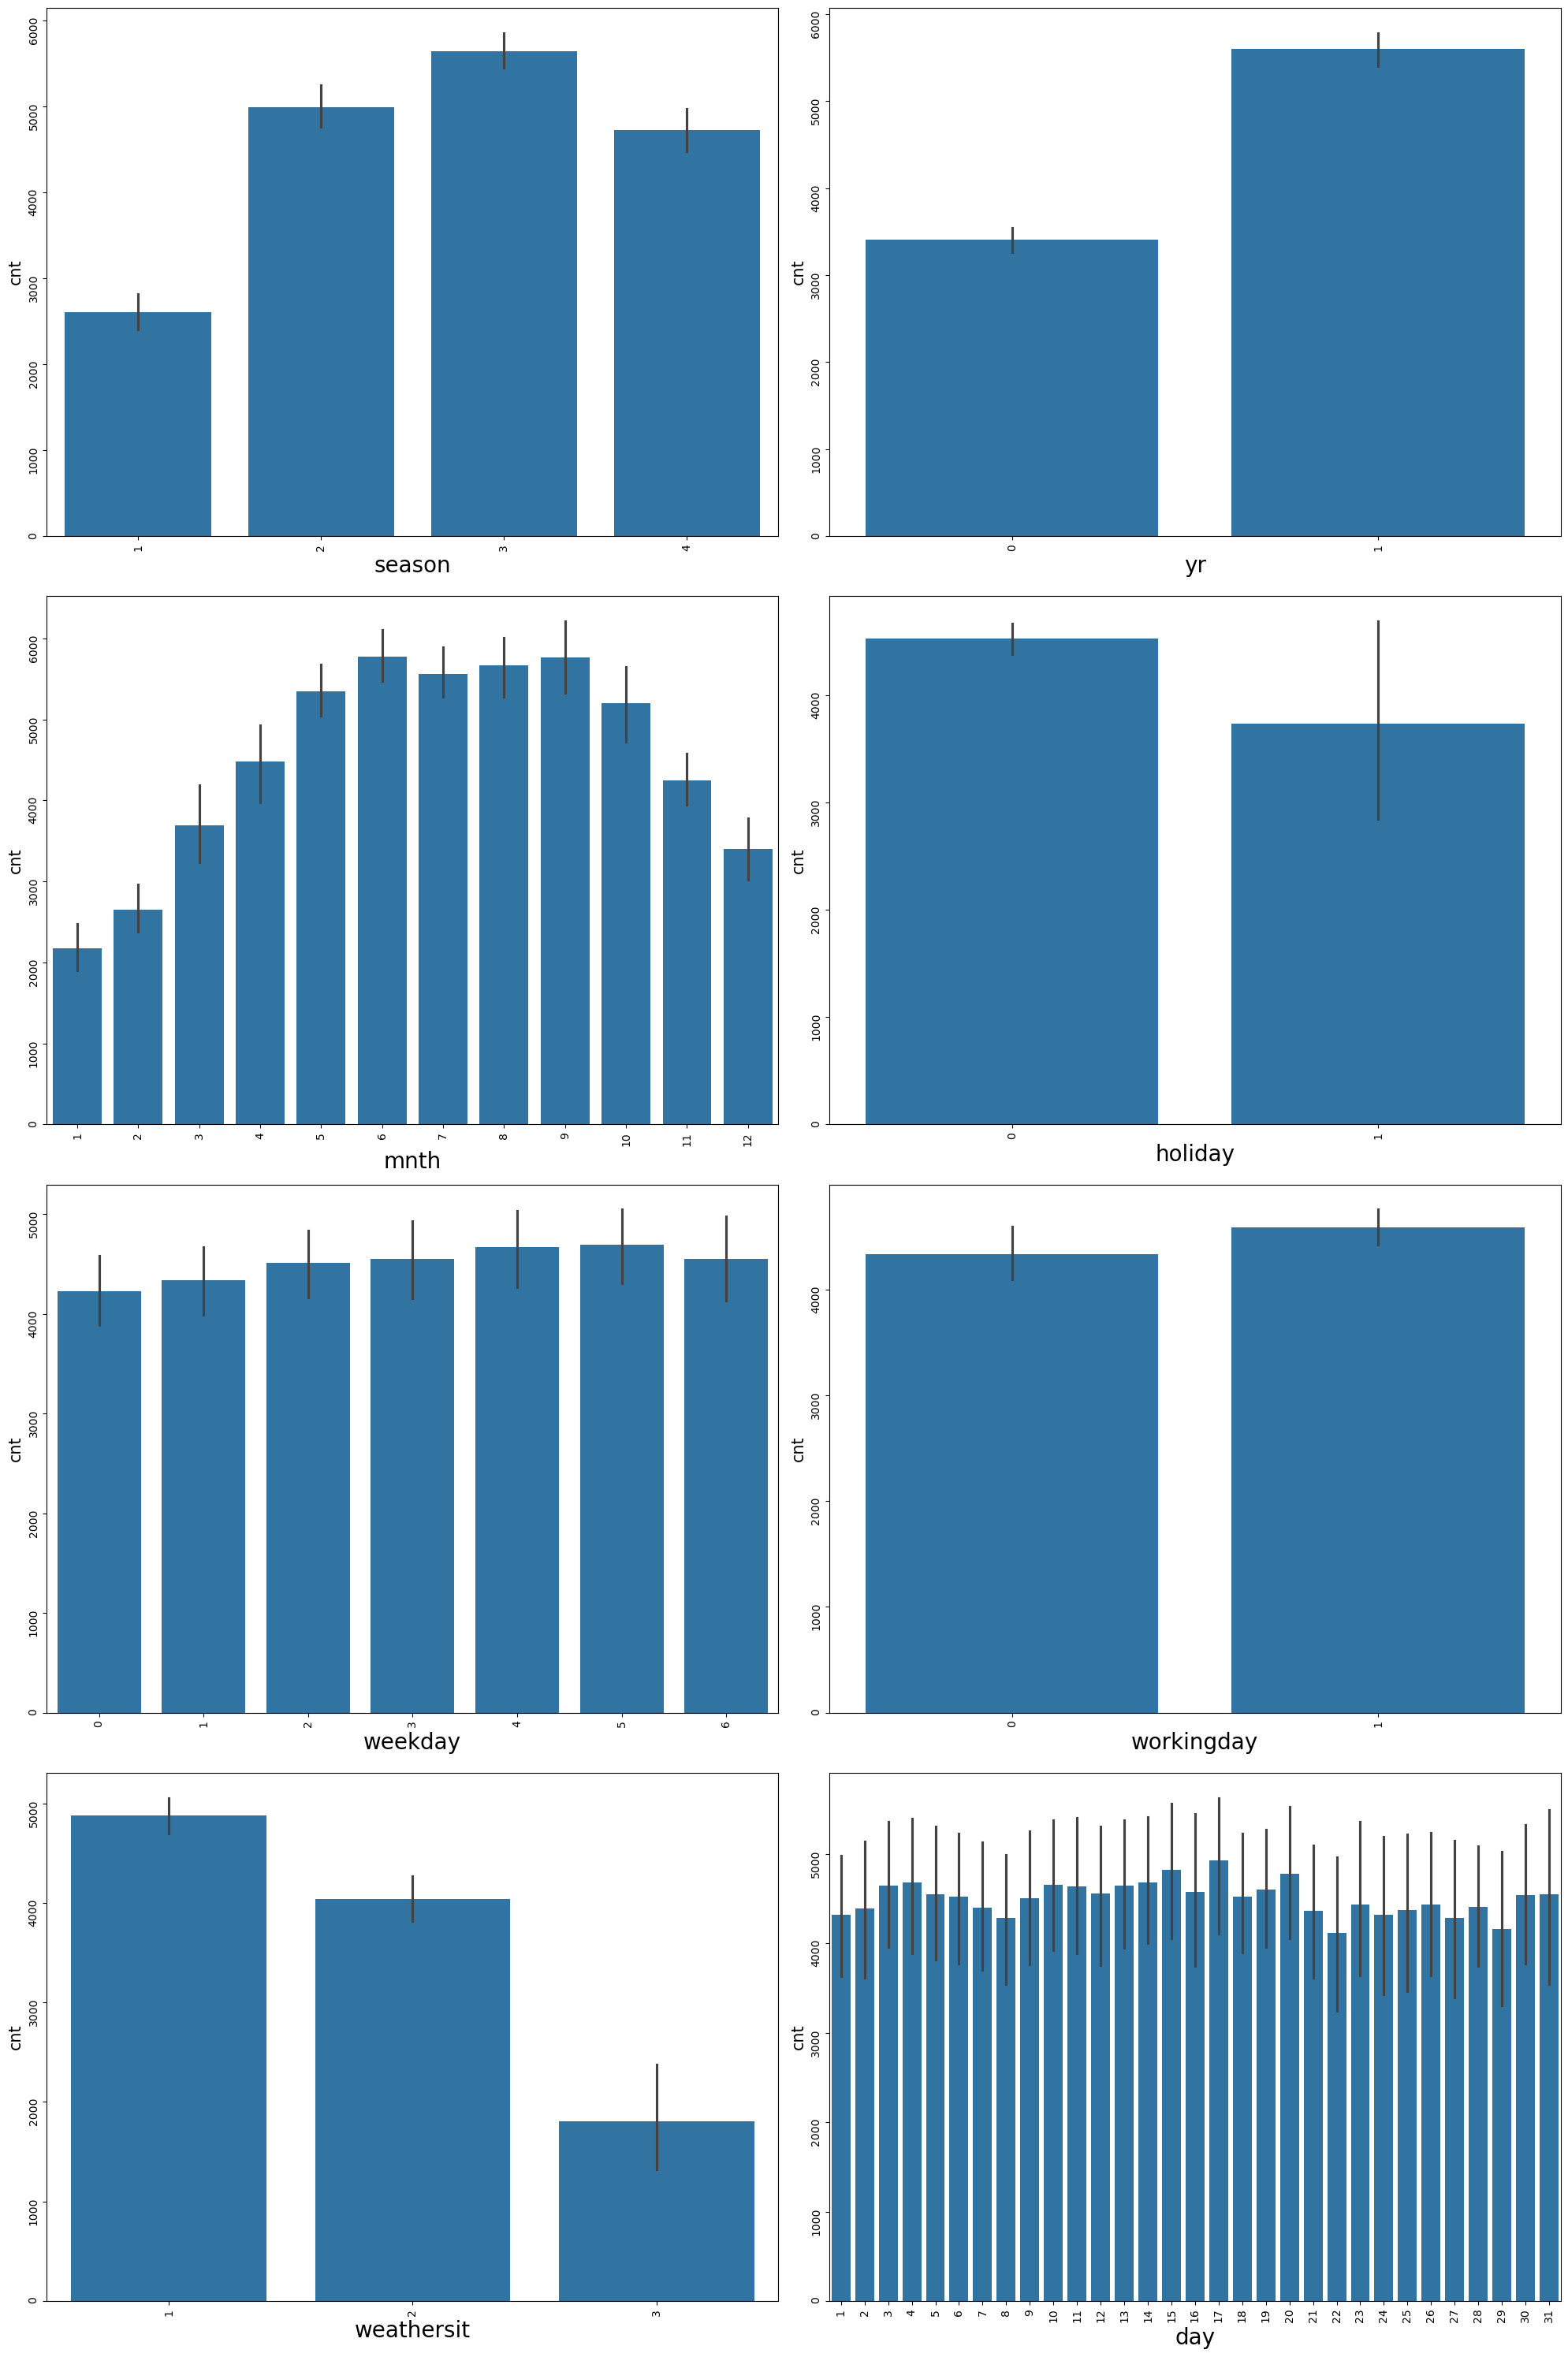

In [17]:
plt.figure(figsize=(20,30),facecolor='white')  # define the plot size
plt_num=1
for i in data[['season','yr','mnth','holiday','weekday','workingday','weathersit','day']]: # for loop
    if plt_num <= 8 :  # if condition
        plt.subplot(4,2,plt_num)  # assign the row and column
        sns.barplot(x=data[i],y=data.cnt)  # create a barplot
        plt.xticks(rotation=90)  
        plt.yticks(rotation=90)
        plt.xlabel(i,fontsize=20)  # assign the xlabel value
        plt.ylabel('cnt',fontsize=15)  # assign the ylabel value
        plt_num += 1  # increment
plt.tight_layout()  # use for data show function

**Insights**
* Here we can see the highest bikes are rented in season 3 and year 2012 and in 5 to 10 month.
* Here we can see the highest bikes are rented on not holidays.
* Highest bikes have given on rent in working days.
* Highest bikes have given in 1st weather situation.

<Axes: xlabel='temp', ylabel='atemp'>

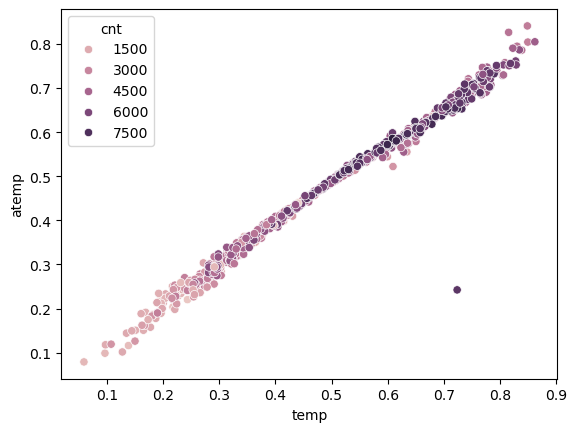

In [18]:
sns.scatterplot(x=data.temp, y=data.atemp,data=data,hue='cnt')  # create scatter plot between temp and atemp

* Here we use scatter plot for check relation between continuous columns.
* Here we can see the positive relation between temp and atemp.

<Axes: xlabel='temp', ylabel='windspeed'>

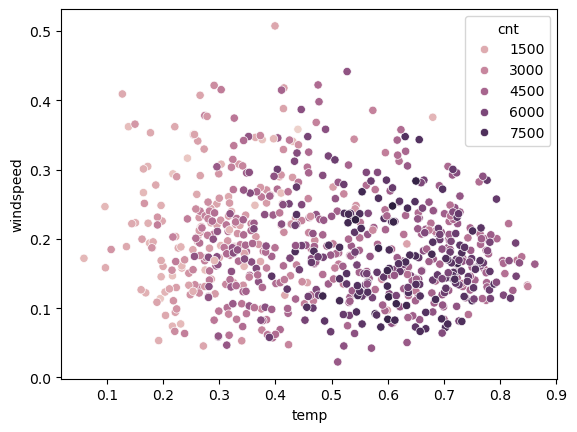

In [19]:
sns.scatterplot(x=data.temp,y=data.windspeed,hue=data.cnt) # create scatter plot between temp and windspeed

* There is no relationship between temp and windspeed.

<Axes: xlabel='hum', ylabel='windspeed'>

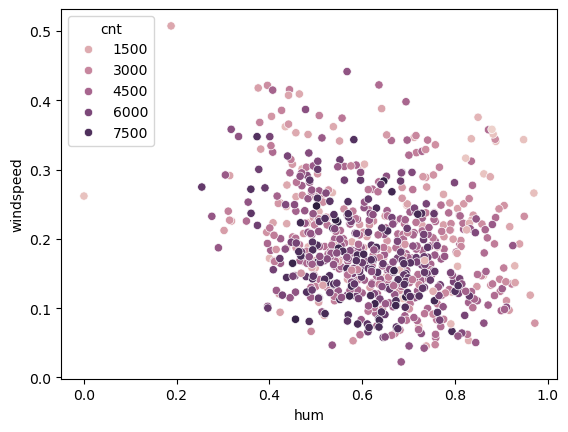

In [20]:
sns.scatterplot(x=data.hum, y=data.windspeed,hue=data.cnt) # create scatter plot between hum and windspeed

* There is no realtionship between hum and windspeed.

### 3. Multivariante Analysis

In [21]:
data.columns  # show the every columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

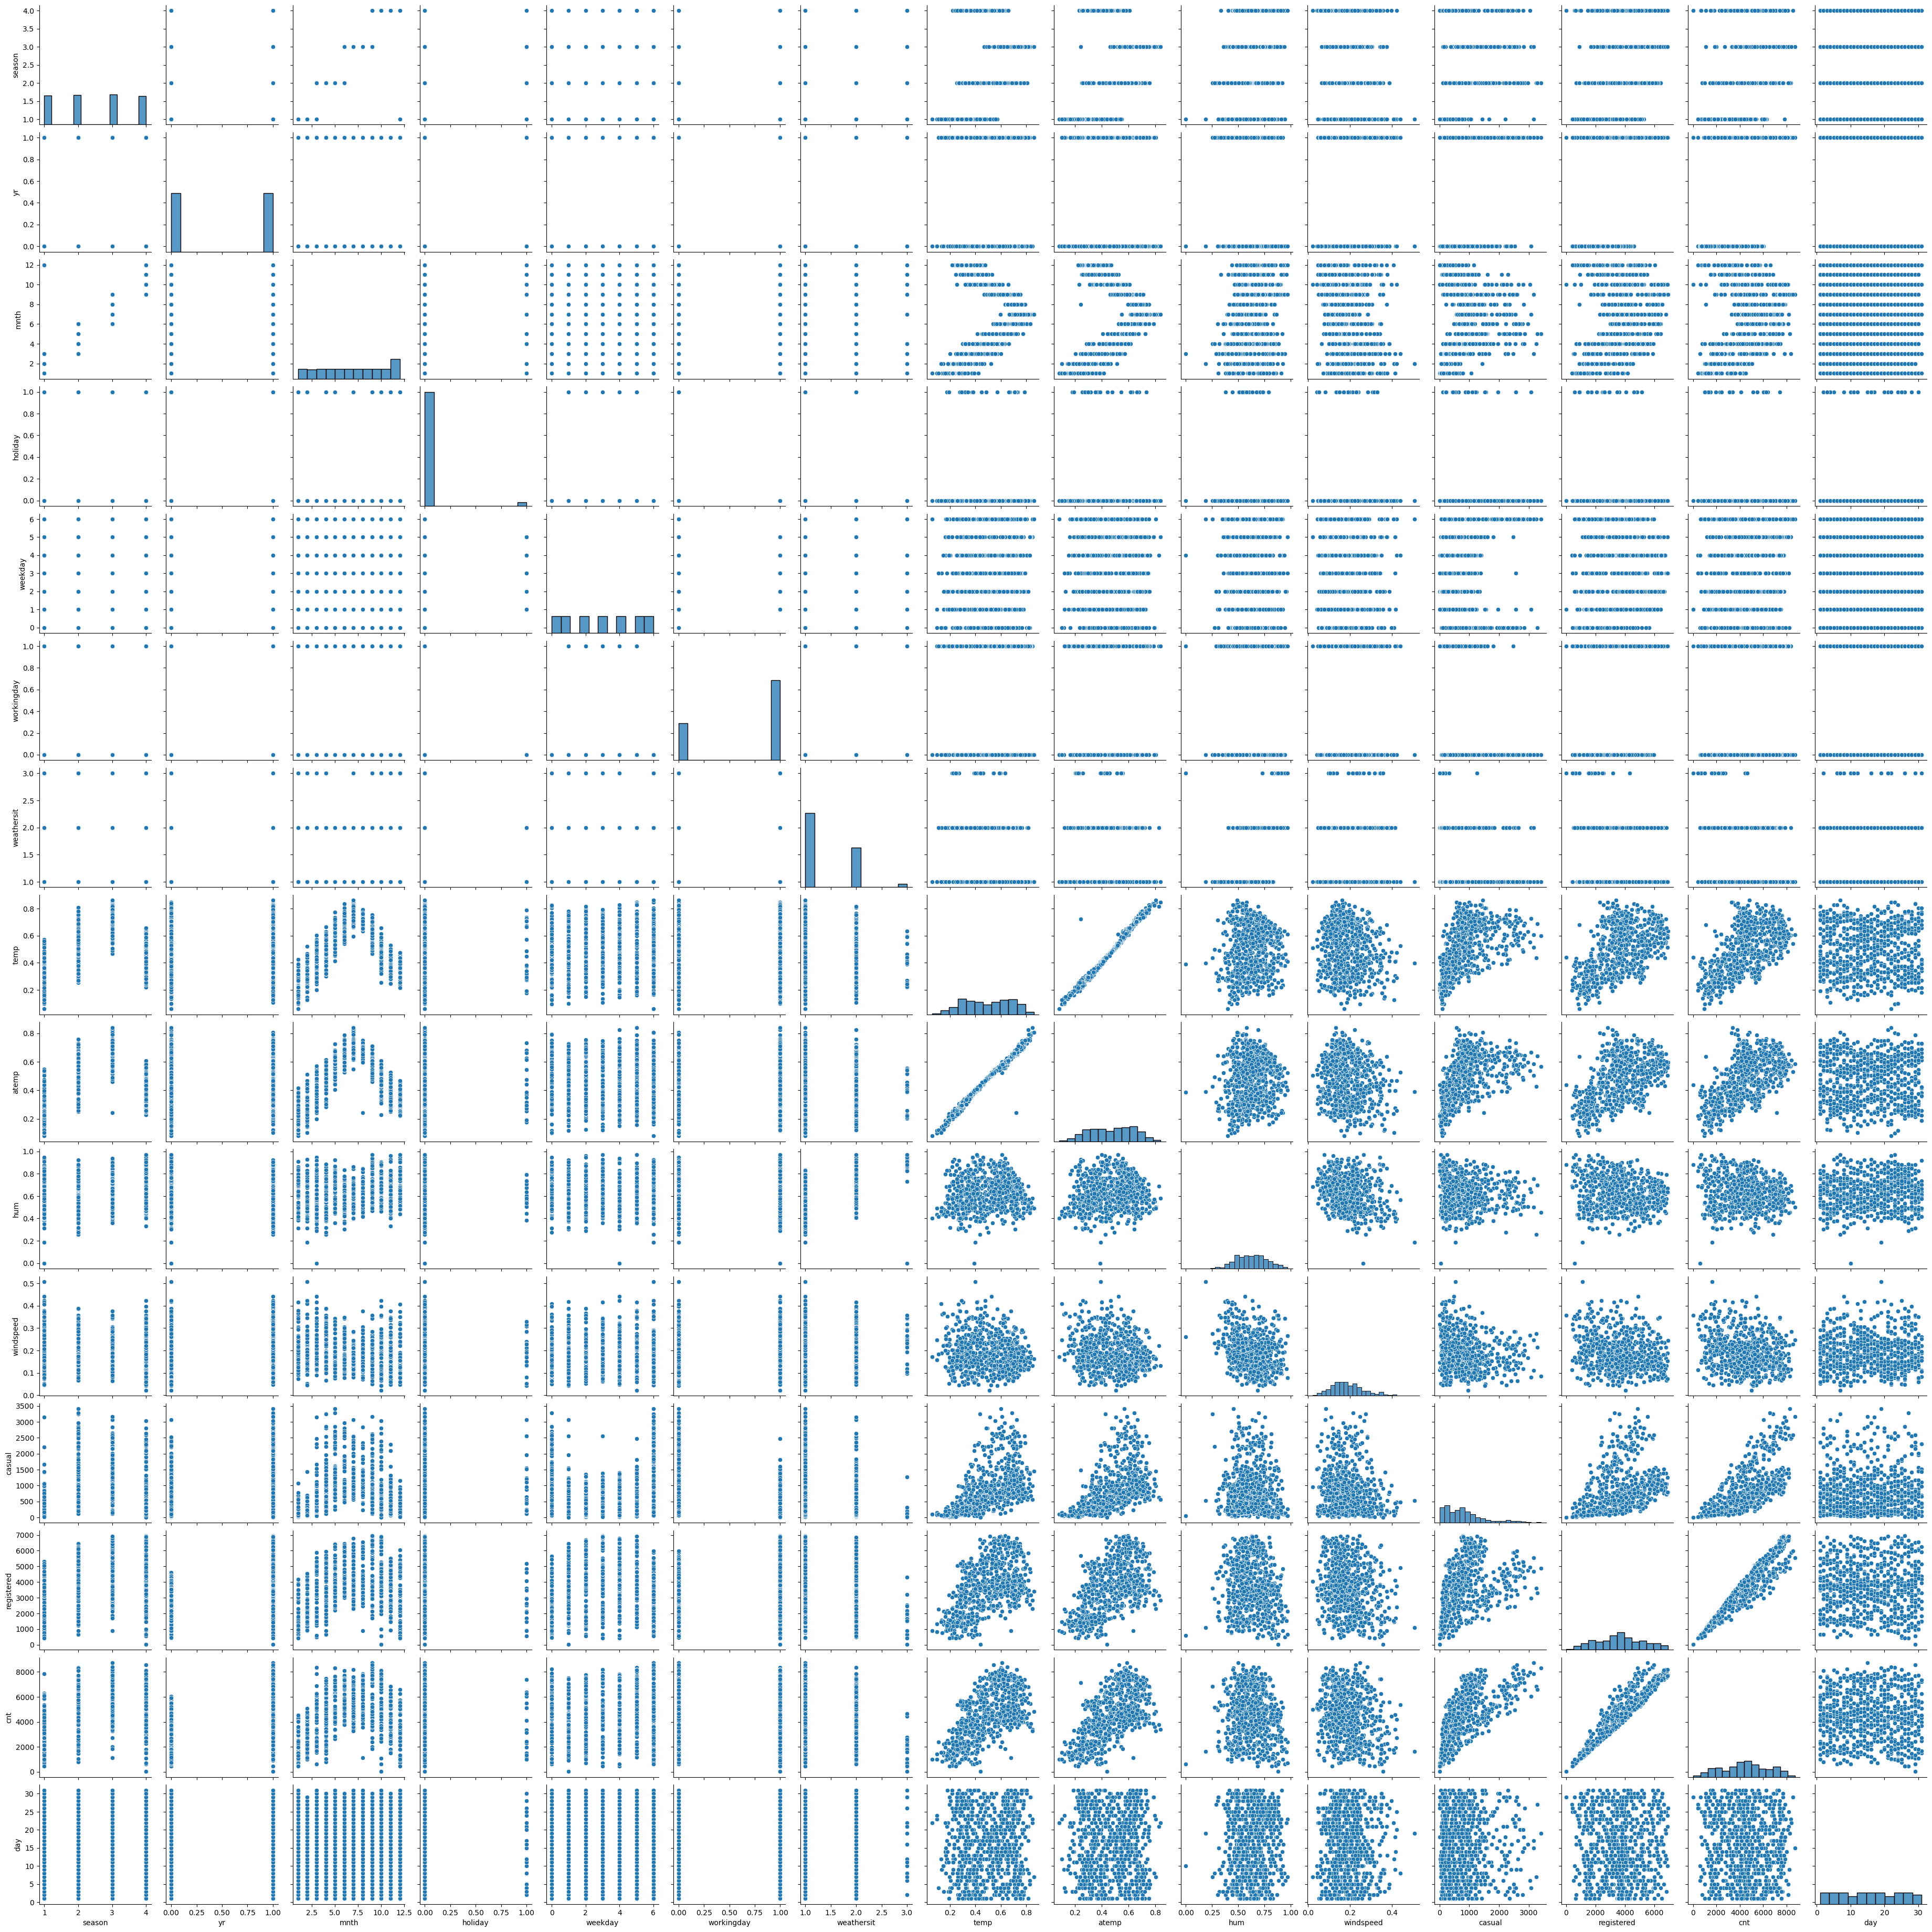

In [22]:
sns.pairplot(data)  # create pair plot for all columns

* Here we can see the positive relation between temp and atemp.
* Here we can see the positive relation between registered and cnt.

#### **Final Report Of EDA**

* Here we use histogram plot for numerical columns where we can see the normal distribution in two columns like hum and windspeed and we can see that the casual column are right skewed.
* The biavariante analysis indicates that bike rentals peak in season 3 and during 2012, with higher usage between the 5th and 10th months and primarily on working days and not holiday.
* Here we can see the positive relationship between temparature and adjusted temparature, as well as between total counts and registered users.


## Feature Engineering :

**Feature Engineering** :- It is the process of using domain knowledge to select, modify or create new features from raw data that can improve the performance of machine learning model. It involves transforming raw data into a format that is more suitable for modeling and can significantly impact model accuracyand effectiveness.

#### 1. Data Preprocessing :

**Data preprocessing** :- It is a crucial step in machine learning that involves transforming raw data into a clean and usable format. This process ensures that the data is suitable for analysis and modeling, ultimately improving the performance and accuracy of machine learning models

In [22]:
data.isnull().sum()  # check the null value

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

* Here we can not see the null values.

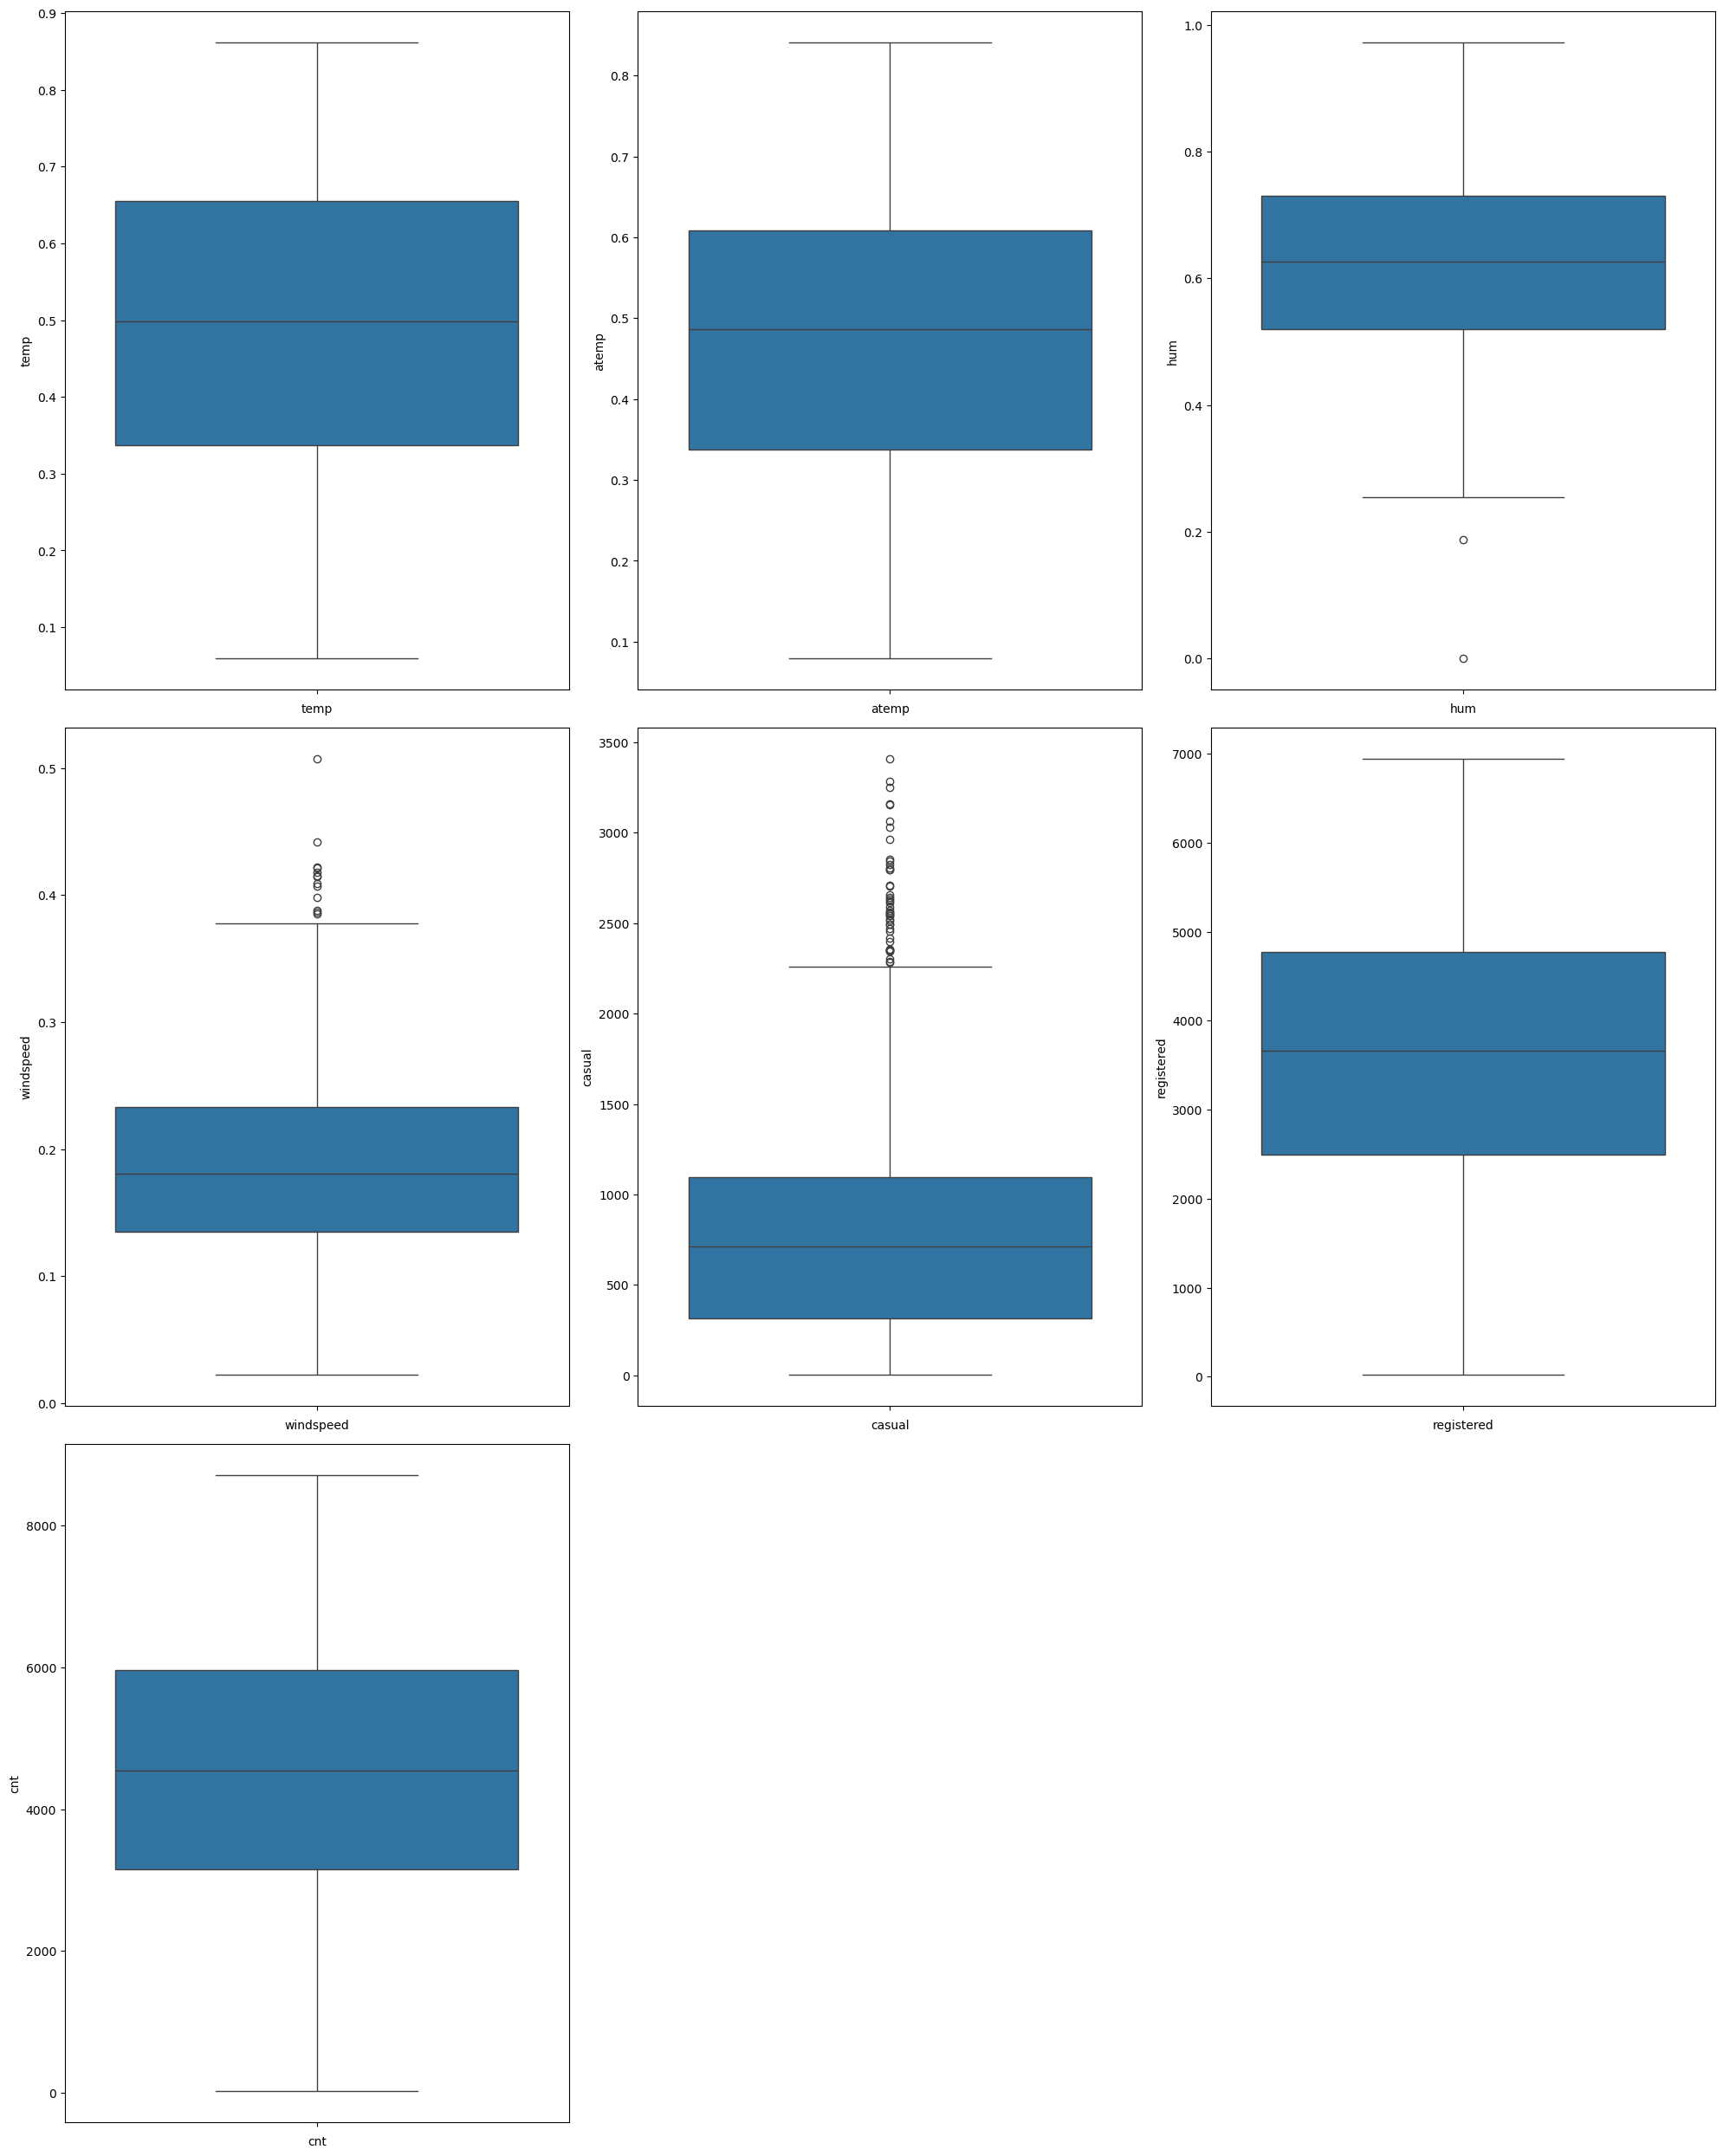

In [30]:
# check the outliers in the dataset
plt.figure(figsize=(20,25),facecolor='white')  # define the plot size
plt_num = 1
for i in con_col:  # define for loop
    if plt_num <=8 :  # apply if condition 
        plt.subplot(3,3,plt_num) # assign raw and column
        sns.boxplot(con_col[i])  # create boxplot
        plt.xlabel(i)  # assign the xlabel value
        plt.ylabel(i)  # assign the ylabel value
        plt_num = plt_num  + 1  # increment
plt.tight_layout() # use for show data

* Here we can see the outliers in three columns like hum, casual and windspeed.

In [23]:
data.hum.median()

0.626667

In [24]:
data.loc[data.hum < 0.2, "hum"] = data.hum.median()  # handle the outliers

<Axes: ylabel='hum'>

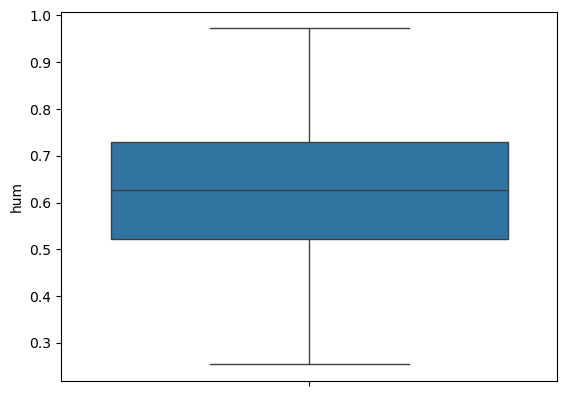

In [25]:
sns.boxplot(data.hum)  # check outliers

In [26]:
data.loc[data.windspeed > 0.36, 'windspeed'] = data.windspeed.median()  # handle the outliers

<Axes: ylabel='windspeed'>

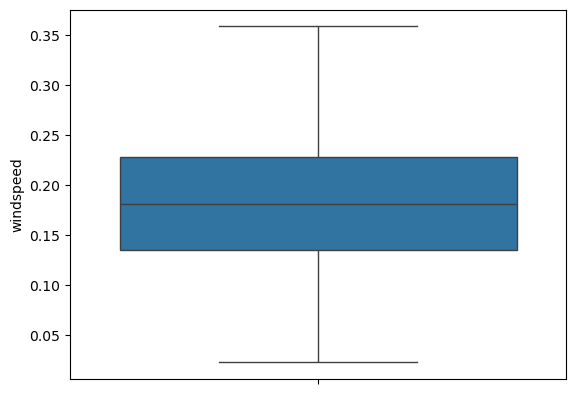

In [27]:
sns.boxplot(data.windspeed)  # check the outliers

In [28]:
data.loc[data.casual>2600, 'casual'] = data.casual.median()  # handle the outliers

<Axes: ylabel='casual'>

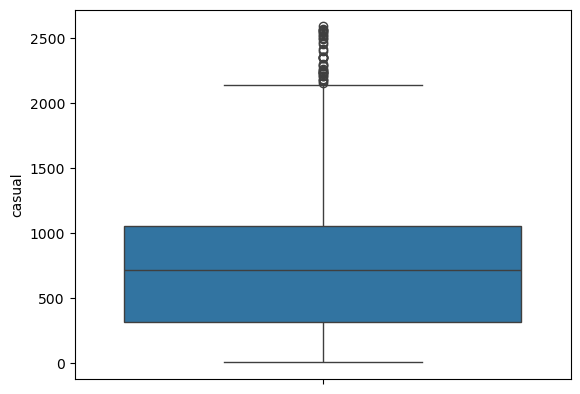

In [29]:
sns.boxplot(data.casual)  # check the outliers

In [30]:
data.head()  # showing the first 5 rows

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  day  
0  0.363625  0.805833   0.160446     331         654   985    1  
1  0.353739  0.696087   0.248539     131         670   801    2  
2  0.189405  0.437273   0.248309     120        1229  1349    3  
3  0.212122  0.590435   0.160296     108        1454  1562    4  
4  0.229270  0.436957   0.186900      82        1518  1600    5

### 2. Feature Selection

**Feature Selection:-** It is the process of identifying and selecting a subset of relevant features (variables, predictors) from a larger set of available features in a dataset. The goal of feature selection is to improve the performance of machine learning models by retaining only the most important and informative features, while eliminating redundant or irrelevant ones.

<Axes: >

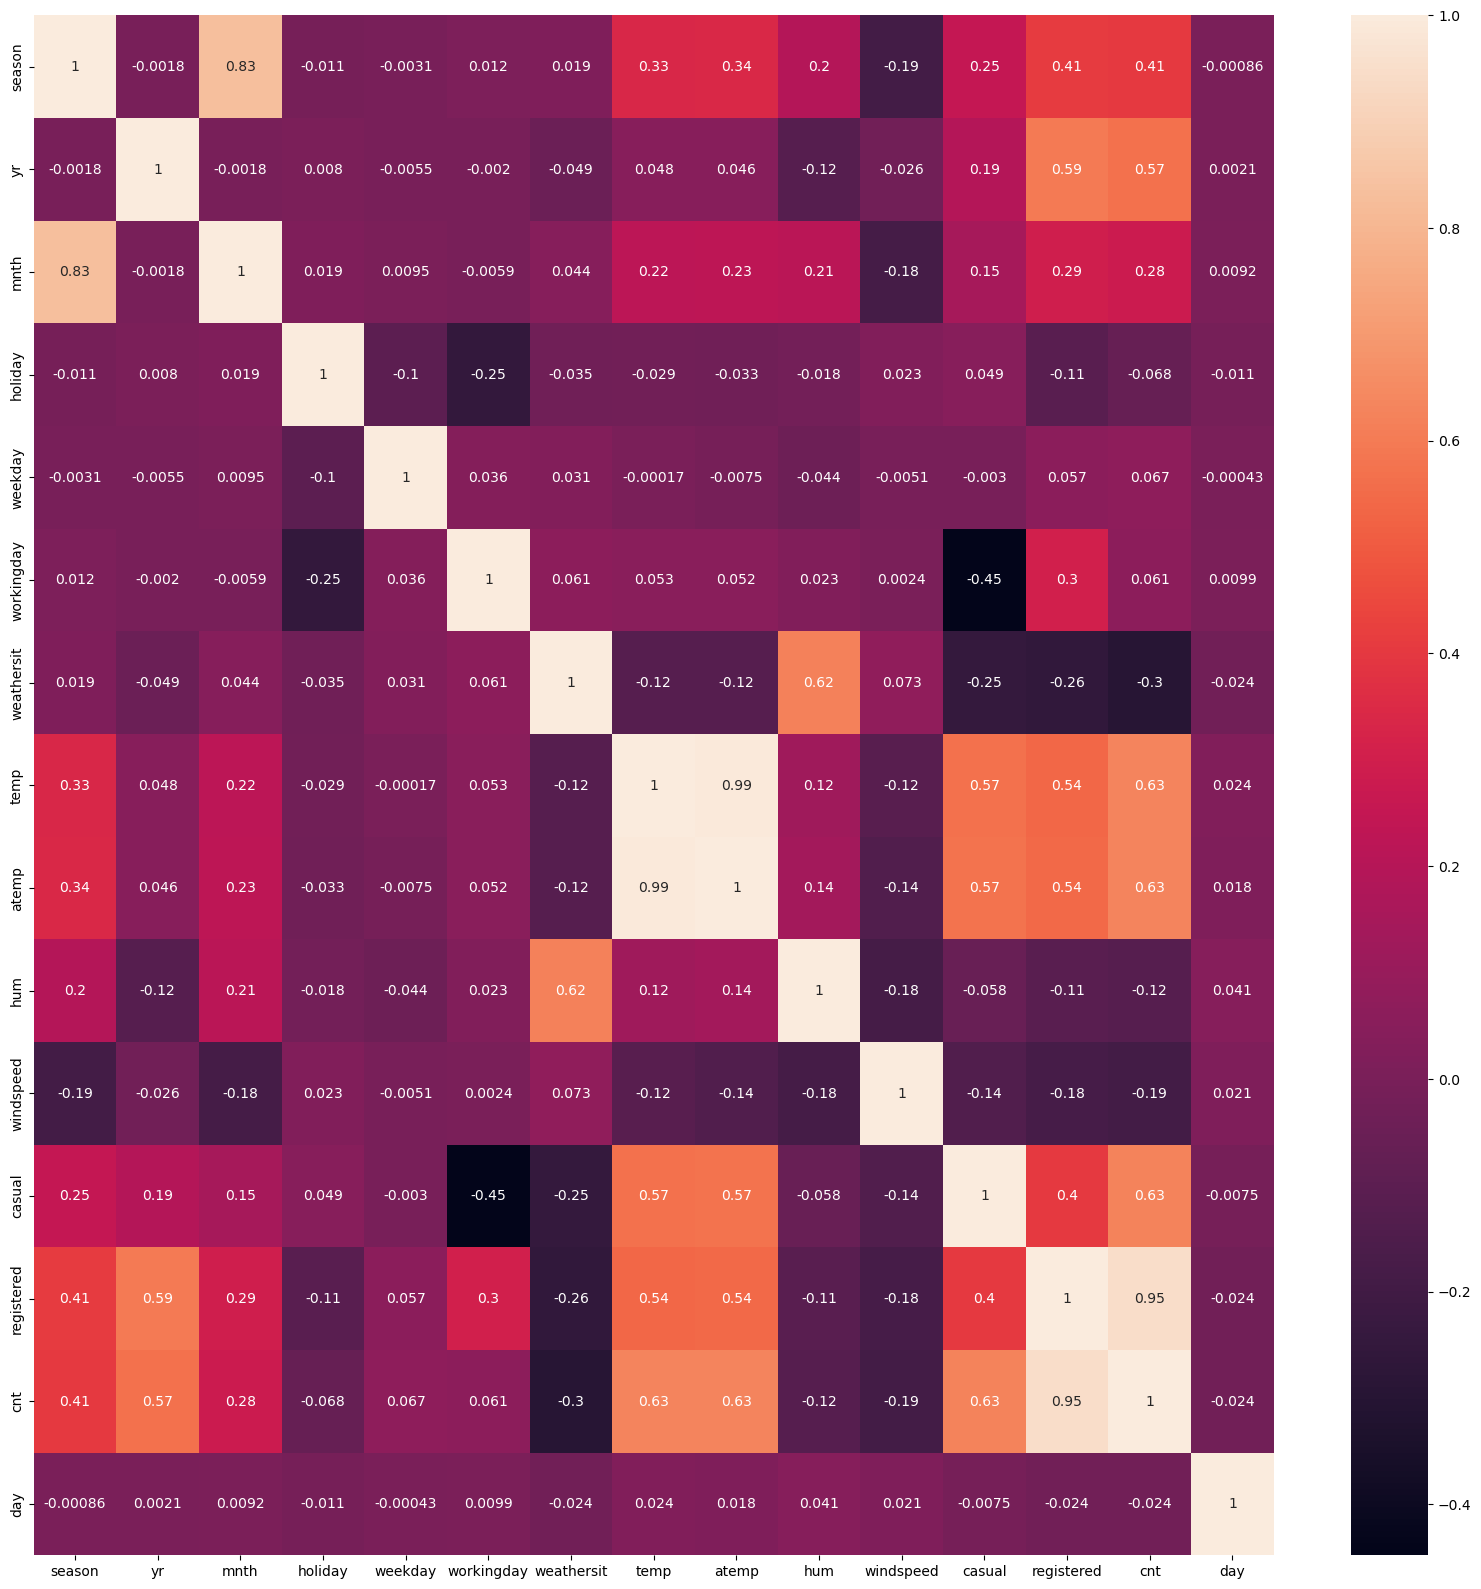

In [31]:
plt.figure(figsize=(20,20))  # define the plot size
sns.heatmap(data.corr(),annot=True) # heatmap for check the relationship

**Insights:**
* Here we can see the high correlation between temp and atemp.
* Here we can see the high correlation between registered and cnt.

In [32]:
data.drop(['atemp'],axis=1,inplace=True)  # drop the atemp column

In [33]:
data.head()  # shows the first 5 rows

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

        hum  windspeed  casual  registered   cnt  day  
0  0.805833   0.160446     331         654   985    1  
1  0.696087   0.248539     131         670   801    2  
2  0.437273   0.248309     120        1229  1349    3  
3  0.590435   0.160296     108        1454  1562    4  
4  0.436957   0.186900      82        1518  1600    5

In [34]:
data.corr()  # shows the correlation

season        yr      mnth   holiday   weekday  workingday  \
season      1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr         -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth        0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday    -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday    -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday  0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit  0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp        0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
hum         0.195570 -0.123385  0.214851 -0.018062 -0.043777    0.022673   
windspeed  -0.189343 -0.026408 -0.182809  0.022866 -0.005098    0.002408   
casual      0.249408  0.194587  0.151059  0.048956 -0.003038   -0.447893   
registered  0.411623  0.594248  0.293488 -0.108745  0.057367    0.303907   
cnt         0.406100  0.566710  0.279977 -0.068348  0.067443    0.061156   
day        -0.000861  0.002061  0.009157 -0.010710 -0.000428    0.009907   

            weathersit      temp       hum  windspeed    casual  registered  \
season        0.019211  0.334315  0.195570  -0.189343  0.249408    0.411623   
yr           -0.048727  0.047604 -0.123385  -0.026408  0.194587    0.594248   
mnth          0.043528  0.220205  0.214851  -0.182809  0.151059    0.293488   
holiday      -0.034627 -0.028556 -0.018062   0.022866  0.048956   -0.108745   
weekday       0.031087 -0.000170 -0.043777  -0.005098 -0.003038    0.057367   
workingday    0.061200  0.052660  0.022673   0.002408 -0.447893    0.303907   
weathersit    1.000000 -0.120602  0.618158   0.072782 -0.248213   -0.260388   
temp         -0.120602  1.000000  0.123732  -0.115727  0.570073    0.540012   
hum           0.618158  0.123732  1.000000  -0.183872 -0.058219   -0.112143   
windspeed     0.072782 -0.115727 -0.183872   1.000000 -0.139437   -0.177383   
casual       -0.248213  0.570073 -0.058219  -0.139437  1.000000    0.404553   
registered   -0.260388  0.540012 -0.112143  -0.177383  0.404553    1.000000   
cnt          -0.297391  0.627494 -0.121426  -0.188881  0.625362    0.945517   
day          -0.023824  0.024253  0.041217   0.021064 -0.007456   -0.024171   

                 cnt       day  
season      0.406100 -0.000861  
yr          0.566710  0.002061  
mnth        0.279977  0.009157  
holiday    -0.068348 -0.010710  
weekday     0.067443 -0.000428  
workingday  0.061156  0.009907  
weathersit -0.297391 -0.023824  
temp        0.627494  0.024253  
hum        -0.121426  0.041217  
windspeed  -0.188881  0.021064  
casual      0.625362 -0.007456  
registered  0.945517 -0.024171  
cnt         1.000000 -0.024204  
day        -0.024204  1.000000

In [35]:
data.cov()  # shows the covariance

season          yr         mnth    holiday     weekday  \
season        1.233892   -0.001025     3.188082  -0.001956   -0.006859   
yr           -0.001025    0.250342    -0.003096   0.000665   -0.005478   
mnth          3.188082   -0.003096    11.915702   0.011073    0.065808   
holiday      -0.001956    0.000665     0.011073   0.027941   -0.034168   
weekday      -0.006859   -0.005478     0.065808  -0.034168    4.019171   
workingday    0.006452   -0.000468    -0.009477  -0.019677    0.033381   
weathersit    0.011628   -0.013284     0.081873  -0.003154    0.033960   
temp          0.067978    0.004360     0.139142  -0.000874   -0.000062   
hum           0.030319   -0.008616     0.103509  -0.000421   -0.012249   
windspeed    -0.014399   -0.000905    -0.043203   0.000262   -0.000700   
casual      162.899496   57.246950   306.602650   4.811632   -3.580951   
registered  713.401960  463.906731  1580.686987 -28.361123  179.444308   
cnt         873.874482  549.293597  1872.230742 -22.131953  261.929723   
day          -0.008429    0.009083     0.278478  -0.015771   -0.007565   

            workingday  weathersit        temp        hum  windspeed  \
season        0.006452    0.011628    0.067978   0.030319  -0.014399   
yr           -0.000468   -0.013284    0.004360  -0.008616  -0.000905   
mnth         -0.009477    0.081873    0.139142   0.103509  -0.043203   
holiday      -0.019677   -0.003154   -0.000874  -0.000421   0.000262   
weekday       0.033381    0.033960   -0.000062  -0.012249  -0.000700   
workingday    0.216442    0.015514    0.004485   0.001472   0.000077   
weathersit    0.015514    0.296910   -0.012029   0.047010   0.002715   
temp          0.004485   -0.012029    0.033508   0.003161  -0.001450   
hum           0.001472    0.047010    0.003161   0.019479  -0.001757   
windspeed     0.000077    0.002715   -0.001450  -0.001757   0.004687   
casual     -122.522469  -79.525836   61.358234  -4.777656  -5.613050   
registered  220.601119 -221.375088  154.230919 -24.420083 -18.947844   
cnt          55.117235 -313.918923  222.514700 -32.829728 -25.050504   
day           0.040607   -0.114368    0.039111   0.050680   0.012705   

                   casual    registered           cnt         day  
season         162.899496  7.134020e+02  8.738745e+02   -0.008429  
yr              57.246950  4.639067e+02  5.492936e+02    0.009083  
mnth           306.602650  1.580687e+03  1.872231e+03    0.278478  
holiday          4.811632 -2.836112e+01 -2.213195e+01   -0.015771  
weekday         -3.580951  1.794443e+02  2.619297e+02   -0.007565  
workingday    -122.522469  2.206011e+02  5.511723e+01    0.040607  
weathersit     -79.525836 -2.213751e+02 -3.139189e+02   -0.114368  
temp            61.358234  1.542309e+02  2.225147e+02    0.039111  
hum             -4.777656 -2.442008e+01 -3.282973e+01    0.050680  
windspeed       -5.613050 -1.894784e+01 -2.505050e+01    0.012705  
casual      345733.275509  3.711437e+05  7.123263e+05  -38.622622  
registered  371143.708146  2.434400e+06  2.857869e+06 -332.245312  
cnt         712326.252788  2.857869e+06  3.752788e+06 -413.089551  
day            -38.622622 -3.322453e+02 -4.130896e+02   77.615198

## Model Creation

In [36]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'day'],
      dtype='object')

In [37]:
x = data.drop('cnt',axis=1) # create independent variable
y = data['cnt']  # create dependent variable

In [38]:
x  # shows the independent variable

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1   0     1        0        6           0           2  0.344167   
1         1   0     1        0        0           0           2  0.363478   
2         1   0     1        0        1           1           1  0.196364   
3         1   0     1        0        2           1           1  0.200000   
4         1   0     1        0        3           1           1  0.226957   
..      ...  ..   ...      ...      ...         ...         ...       ...   
726       1   1    12        0        4           1           2  0.254167   
727       1   1    12        0        5           1           2  0.253333   
728       1   1    12        0        6           0           2  0.253333   
729       1   1    12        0        0           0           1  0.255833   
730       1   1    12        0        1           1           2  0.215833   

          hum  windspeed  casual  registered  day  
0    0.805833   0.160446     331         654    1  
1    0.696087   0.248539     131         670    2  
2    0.437273   0.248309     120        1229    3  
3    0.590435   0.160296     108        1454    4  
4    0.436957   0.186900      82        1518    5  
..        ...        ...     ...         ...  ...  
726  0.652917   0.350133     247        1867   27  
727  0.590000   0.155471     644        2451   28  
728  0.752917   0.124383     159        1182   29  
729  0.483333   0.350754     364        1432   30  
730  0.577500   0.154846     439        2290   31  

[731 rows x 13 columns]

In [39]:
y  # shows the dependent variable

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

#### split the data into training and testing

In [40]:
from sklearn.model_selection import train_test_split  # import train test split model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) # split the data into training and testing

In [41]:
x_train # shows the independent training data

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
462       2   1     4        0        6           0           1  0.437500   
331       4   0    11        0        1           1           1  0.503478   
166       2   0     6        0        4           1           2  0.628333   
106       2   0     4        0        0           0           1  0.456667   
719       4   1    12        0        4           1           2  0.330000   
..      ...  ..   ...      ...      ...         ...         ...       ...   
440       1   1     3        0        5           1           2  0.435833   
165       2   0     6        0        3           1           1  0.626667   
7         1   0     1        0        6           0           2  0.165000   
219       3   0     8        0        1           1           1  0.765000   
326       4   0    11        0        3           1           2  0.440833   

          hum  windspeed  casual  registered  day  
462  0.254167   0.274871     713        3605    7  
331  0.743043   0.142122     253        3614   28  
166  0.688333   0.206471     545        3222   16  
106  0.479583   0.303496    1558        2186   17  
719  0.667917   0.132463     314        3814   20  
..        ...        ...     ...         ...  ...  
440  0.842083   0.113192     548        3830   16  
165  0.471667   0.167912     769        4411   15  
7    0.535833   0.266804      68         891    8  
219  0.592083   0.192175     846        3480    8  
326  0.757917   0.335825     112        2454   23  

[584 rows x 13 columns]

In [42]:
x_test  # check the independent testing data

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
120       2   0     5        0        0           0           2  0.451667   
498       2   1     5        0        0           0           1  0.612500   
450       2   1     3        0        1           1           1  0.445833   
556       3   1     7        0        2           1           2  0.720833   
188       3   0     7        0        5           1           2  0.709167   
..      ...  ..   ...      ...      ...         ...         ...       ...   
423       1   1     2        0        2           1           1  0.359167   
140       2   0     5        0        6           0           1  0.602500   
62        1   0     3        0        5           1           2  0.261667   
304       4   0    11        0        2           1           1  0.400833   
313       4   0    11        0        4           1           2  0.380000   

          hum  windspeed  casual  registered  day  
120  0.762083   0.106354    1138        2213    1  
498  0.576250   0.225117    2172        3946   13  
450  0.477917   0.180975     795        4763   26  
556  0.667500   0.151737     954        5336   10  
188  0.757917   0.225129     692        3348    8  
..        ...        ...     ...         ...  ...  
423  0.395833   0.193417     229        4134   28  
140  0.626667   0.120650    2258        3547   21  
62   0.610417   0.203346     214        1730    4  
304  0.683750   0.135571     410        3658    1  
313  0.813333   0.189067     190        2743   10  

[147 rows x 13 columns]

In [43]:
y_train  # check the dependent training data

462    6857
331    3867
166    3767
106    3744
719    4128
       ... 
440    4378
165    5180
7       959
219    4326
326    2566
Name: cnt, Length: 584, dtype: int64

In [44]:
y_test  # check the dependent testing data

120    3351
498    6118
450    5558
556    6290
188    4040
       ... 
423    4363
140    5805
62     1944
304    4068
313    2933
Name: cnt, Length: 147, dtype: int64

## Model Selection

### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression  # import Linear Regression model

In [46]:
lr = LinearRegression()  # create an instance object
lr.fit(x_train,y_train)  # train the model

LinearRegression()

In [47]:
lr_pred = lr.predict(x_test)  # predict the testing data

### Model Evaluation

In [48]:
#check the linear regression model performance
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  # import the regression metrics  

In [49]:
r2_1 = r2_score(y_test,lr_pred)  # check the model performance
r2_1

0.9862329739849046

In [50]:
mse1 = mean_squared_error(y_test,lr_pred) # calculate mean squared error
mse1

45801.42748356048

In [51]:
mae1 = mean_absolute_error(y_test,lr_pred)  # check mean absolute error
mae1

143.4028115674265

In [52]:
y_lrtr = lr.predict(x_train)  #predict the training data
r2_score(y_train, y_lrtr)  # check the model performance

0.9717258632380696

<Axes: xlabel='cnt', ylabel='Count'>

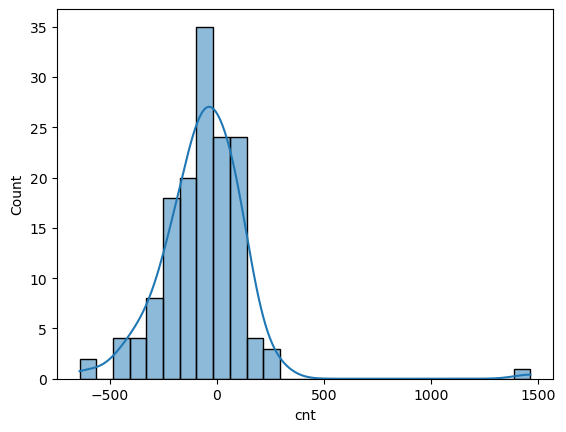

In [53]:
error = y_test - lr_pred  # check error value
sns.histplot(error, kde=True)  # plot the error value

**Conclusion**
* The Linear Regression model gives the generalize model based on testing r2_score is 0.98 and training r2_score is 0.97.
* Error also show the normal distribution.

### SVM (Support Vector Machine)

In [54]:
from sklearn.svm import SVR  # import SVR model

In [55]:
svr = SVR()  # create an instance object
svr.fit(x_train,y_train)  # train the model

SVR()

In [56]:
svr_pred = svr.predict(x_test) # predict the testing data

In [57]:
r2_2 = r2_score(y_test, svr_pred)  # check the model performance
r2_2

0.08067251866025593

In [58]:
mse2 = mean_squared_error(y_test, svr_pred)  # check the mean squared error
mse2

3058504.496472744

In [59]:
mae2 = mean_absolute_error(y_test, svr_pred)  # check mean absolute error
mae2

1410.2769619463056

In [60]:
y_svrtr = svr.predict(x_train)  # predict the training data
r2_score(y_train, y_svrtr)  # check the model performance

0.08018520162525211

<Axes: xlabel='cnt', ylabel='Count'>

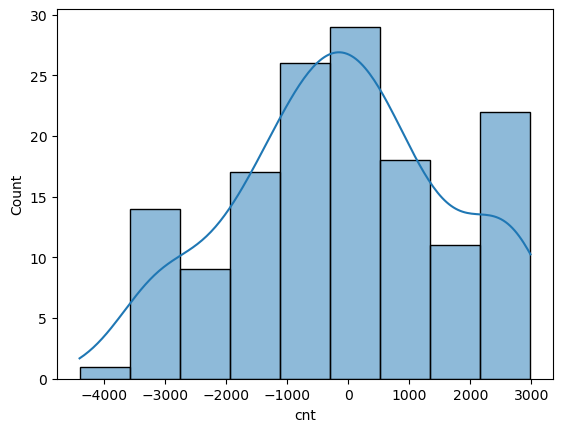

In [61]:
error = y_test - svr_pred  # chcek the error value
sns.histplot(error,kde=True)  # plot the error

**Conclusion**
* The SVM model gives the generalize model based on testing r2_score is 0.08 and training r2_score is 0.08.
* Error not follow the normal distribution.
* The SVM Model required Hyperparameter tuning.

### Decision Tree Algorithm

In [62]:
from sklearn.tree import DecisionTreeRegressor  # import decision tree model
dt = DecisionTreeRegressor(max_depth = 15, criterion='squared_error', splitter='best',min_samples_split=5,min_samples_leaf=6) # create an instance object

In [63]:
dt.fit(x_train,y_train)  # train the model

DecisionTreeRegressor(max_depth=15, min_samples_leaf=6, min_samples_split=5)

In [64]:
dt_pred = dt.predict(x_test)  # predict the testing data

In [65]:
r2_3 = r2_score(y_test, dt_pred)  # check the model performance
r2_3

0.9847936310956336

In [66]:
mse3 = mean_squared_error(y_test,dt_pred)  # check mean squared error
mse3

50589.96778955245

In [67]:
mae3 = mean_absolute_error(y_test,dt_pred)  # check mean absolute error
mae3

166.06427368927368

In [68]:
y_trdt = dt.predict(x_train)  # predict the training dadta
r2_score(y_train,y_trdt) # check the model performance

0.9892605972136084

<Axes: xlabel='cnt', ylabel='Count'>

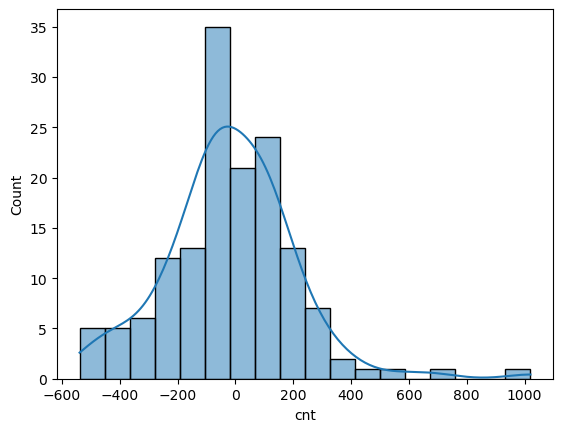

In [69]:
error = y_test - dt_pred  # check the error value
sns.histplot(error, kde=True)  # plot the error value

**Conclusion**
* The Decision Tree Regressor model show the generalize model based on testing r2_score is 0.9847 and training r2_score is 0.9892.
* Error also show the normal distribution.
* Decision Tree Regressor model not required the Hyperparamater tuning.

### Bagging Algorothm

In [70]:
from sklearn.ensemble import BaggingRegressor  # import Bagging Regressor model
br = BaggingRegressor()  # create an instance object
br.fit(x_train,y_train)  # train the model

BaggingRegressor()

In [71]:
br_pred = br.predict(x_test)  # predict the testing data

In [72]:
r2_4 = r2_score(y_test, br_pred)  # check the model performance
r2_4

0.9927273614912949

In [73]:
mse4 = mean_squared_error(y_test, br_pred)  # check the mean squared error
mse4

24195.29278911565

In [74]:
mae4 = mean_absolute_error(y_test, br_pred)  # check mean absolute error
mae4

100.08707482993196

In [75]:
y_trbr = br.predict(x_train)  # predict the training data
r2_score(y_train, y_trbr) # check the model performance

0.997959651619845

<Axes: xlabel='cnt', ylabel='Count'>

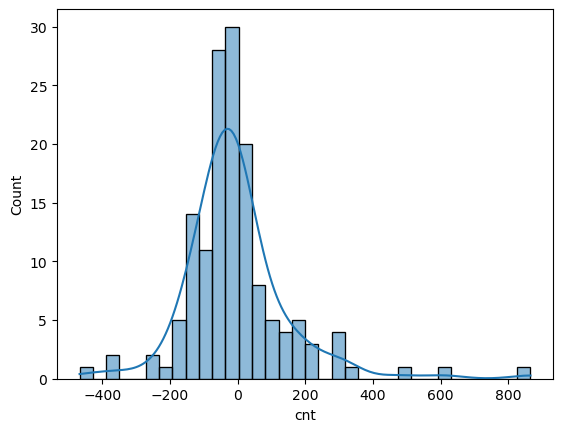

In [76]:
error = y_test - br_pred  # check the error value
sns.histplot(error, kde=True)  # plot the error value

**Conclusion**
* The BaggingRegressor model show the generalize model based on testing r2_score is 0.9916 and training r2_score is 0.9974.
* Error also show the normal distribution.
* BaggingRegressor model not required the Hyperparamater tuning.

### Random Forest Algorithm

In [77]:
from sklearn.ensemble import RandomForestRegressor  # import Random forest regressor model
# rf = RandomForestRegressor(n_estimators=200, random_state=100, criterion='squared_error', max_depth = 8, max_features=10)
rf = RandomForestRegressor(n_estimators=200,random_state=40)  # create an instance object

In [78]:
rf.fit(x_train,y_train) # train the model

RandomForestRegressor(n_estimators=200, random_state=40)

In [79]:
rf_pred = rf.predict(x_test) # predict the testing data

In [80]:
r2_5 = r2_score(y_test,rf_pred)  # check the model performance
r2_5

0.9948453529758118

In [81]:
mse5 = mean_squared_error(y_test,rf_pred)  # check mean squared error
mse5

17148.960975510206

In [82]:
mae5 = mean_absolute_error(y_test,rf_pred)  # check mean absolute error
mae5

88.1822448979592

In [83]:
y_rftr = rf.predict(x_train)  # predict the training data
r2_score(y_train, y_rftr)  # check the model performance

0.9984530492965489

<Axes: xlabel='cnt', ylabel='Count'>

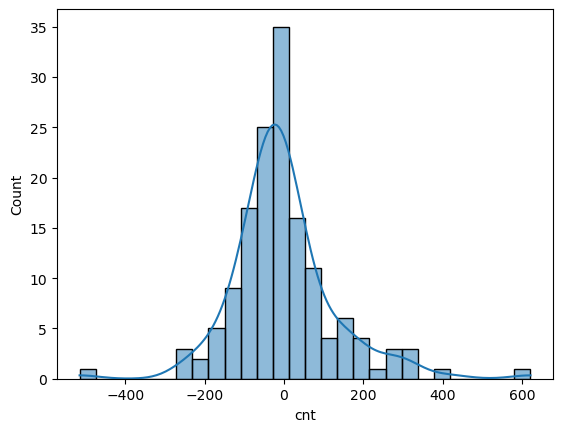

In [84]:
error = y_test - rf_pred  # check error value
sns.histplot(error, kde=True)  # plot the error value

**Conclusion**
* The Random Forest Regressor model show the generalize model based on testing r2_score is 0.9948 and training r2_score is 0.9984.
* Error also show the normal distribution.
* Random Forest Regressor model not required the Hyperparamater tuning.

### Gradient Boosting Algorithm

In [85]:
from sklearn.ensemble import GradientBoostingRegressor  # import Gradient Boosting Regressor model
gb = GradientBoostingRegressor()  # create an instance object

In [86]:
gb.fit(x_train,y_train)  # train the model

GradientBoostingRegressor()

In [87]:
gb_pred = gb.predict(x_test) # predict the testing data

In [88]:
r2_6 = r2_score(y_test,gb_pred)  # check the model performance
r2_6

0.991166197163383

In [89]:
mse6 = mean_squared_error(y_test,gb_pred)  # check the mean squared error
mse6

29389.120030843857

In [90]:
mae6 = mean_absolute_error(y_test,gb_pred)  # check the mean absolute error
mae6

123.29156015367973

In [91]:
y_trgb = gb.predict(x_train)  # predict the training data
r2_score(y_train,y_trgb)  # check the model performance

0.996809673515453

<Axes: xlabel='cnt', ylabel='Count'>

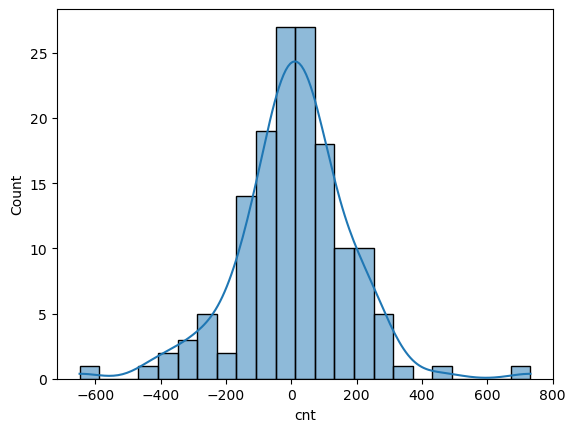

In [92]:
error = y_test - gb_pred  # check the error value
sns.histplot(error,kde=True) # plot the error value

**Conclusion**
* The Gradient Boosting Regressor model show the generalize model based on testing r2_score is 0.9911 and training r2_score is 0.9968.
* Error also show the normal distribution.
* Gradient Boosting Regressor model not required the Hyperparamater tuning.

### eXtreme Gradient Boosting

In [93]:
from xgboost import XGBRegressor  # import XGBRegressor model

In [94]:
xgb = XGBRegressor(n_estimators = 150, learning_rate = 0.1,max_depth=20) #create an instance object

In [95]:
xgb.fit(x_train,y_train)  # train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [96]:
xgb_pred = xgb.predict(x_test)  # predict the testing data

In [97]:
r2_7 = r2_score(y_test,xgb_pred)  # check the model performance
r2_7

0.9944145925115404

In [98]:
mse7 = mean_squared_error(y_test,xgb_pred)  # check mean squared error
mse7

18582.055105315667

In [99]:
mae7 = mean_absolute_error(y_test,xgb_pred)  # check mean absolute error
mae7

94.97460376973055

In [100]:
y_trxgb = xgb.predict(x_train)  # predict the training data
r2_score(y_train, y_trxgb)  # check the model performance

0.9999999966849564

<Axes: xlabel='cnt', ylabel='Density'>

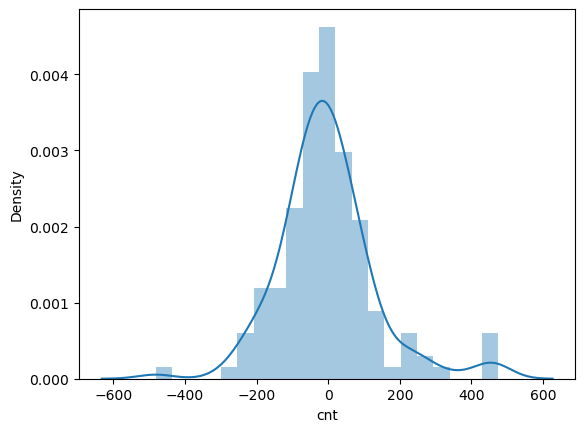

In [101]:
error = y_test - xgb_pred  # check error value
sns.distplot(error, kde=True)  # plot the error value

**Conclusion**
* The XGBRegressor model show the generalize model based on testing r2_score is 0.9947 and training r2_score is 0.9999.
* Error also show the normal distribution.
* XGBRegressor model not required the Hyperparamater tuning.

### Adda Boost Algorithm

In [102]:
from sklearn.ensemble import AdaBoostRegressor  # import AdaBoost Regressor model
ab = AdaBoostRegressor()  # create an instance object

In [103]:
ab.fit(x_train,y_train)  # train the model

AdaBoostRegressor()

In [104]:
ab_pred = ab.predict(x_test)  # predict the testing data

In [105]:
r2_8 = r2_score(y_test,ab_pred)  # check the model performance
r2_8

0.9585458426071621

In [106]:
mse8 = mean_squared_error(y_test,ab_pred)   # check mean squared error
mse8

137913.5611161265

In [107]:
mae8 = mean_absolute_error(y_test, ab_pred)  # check mean absolute error
mae8

313.7332150688857

In [108]:
y_trab = ab.predict(x_train)  # predict the training data
r2_score(y_train,y_trab)  # check the model performance

0.9620977456472006

<Axes: xlabel='cnt', ylabel='Count'>

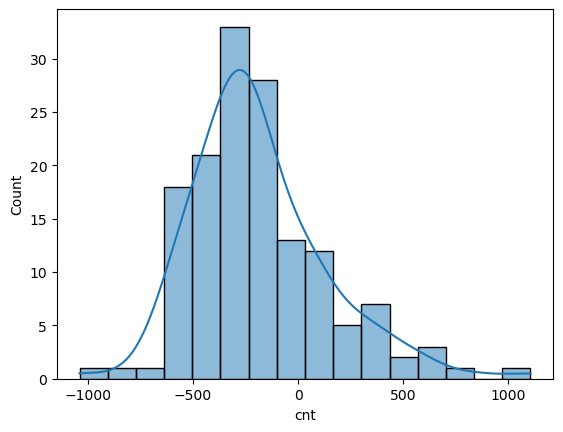

In [109]:
error = y_test - ab_pred  # check the error value
sns.histplot(error, kde=True)  # plot the error value

**Conclusion**
* The AdaBoost Regressor model show the generalize model based on testing r2_score is 0.95 and training r2_score is 0.96.
* Error also show the skewed distribution.
* AdaBoost Regressor model not required the Hyperparamater tuning.

### ANN : Artificial Neural Networks

In [110]:
from sklearn.neural_network import MLPRegressor  # import MLPRegressor model

In [111]:
mlp = MLPRegressor()  # create an instance object
mlp.fit(x_train, y_train)  # train the model

MLPRegressor()

In [112]:
mlp_pred = mlp.predict(x_test)  # predict the testing data

In [113]:
r2_9 = r2_score(y_test,mlp_pred) # check the model performance
r2_9

0.9891723174315565

In [114]:
mse9 = mean_squared_error(y_test,mlp_pred)  # check mean squared error
mse9

36022.545278101505

In [115]:
mae9 = mean_absolute_error(y_test,mlp_pred)  # check mean absolute error
mae9

92.94221059768383

In [116]:
y_tr = mlp.predict(x_train) # predict the training data
r2_score(y_train,y_tr) # check the model performance

0.9592963556839259

<Axes: xlabel='cnt', ylabel='Density'>

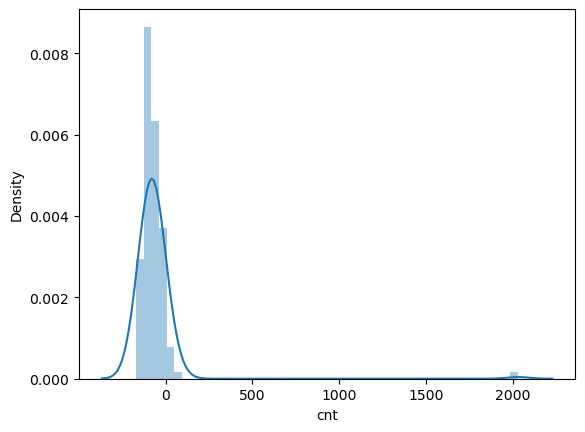

In [117]:
error = y_test - mlp_pred  # check error value
sns.distplot(error,kde=True)  # plot the error value

**Conclusion**
* The ANN model show the generalize model based on testing r2_score is 0.9894 and training r2_score is 0.9587.
* Error also show the normal distribution.
* ANN-MLPRegressor model not required the Hyperparamater tuning.

### KNN : K-Nearest Neighbors

In [120]:
from sklearn.neighbors import KNeighborsRegressor  #  import th KNN model
knn = KNeighborsRegressor(weights='uniform',leaf_size=80, n_jobs=-1, n_neighbors=5,algorithm='auto') # create an instance objcet

In [121]:
knn.fit(x_train,y_train)  # train the model

KNeighborsRegressor(leaf_size=80, n_jobs=-1)

In [122]:
knn_pred = knn.predict(x_test) # predict the testing data

In [123]:
r2_10 = r2_score(y_test,knn_pred)  # check the model performance
r2_10

0.9768230067479826

In [124]:
mse10 = mean_squared_error(y_test,knn_pred) #check mean squared error
mse10

77107.3850340136

In [125]:
mae10 = mean_absolute_error(y_test,knn_pred)  # check mean absolute error
mae10

125.19455782312927

In [126]:
y_tr_knn = knn.predict(x_train)  # predict the training data
r2_score(y_train, y_tr_knn) # check the model performance

0.9745204156978029

<Axes: xlabel='cnt', ylabel='Density'>

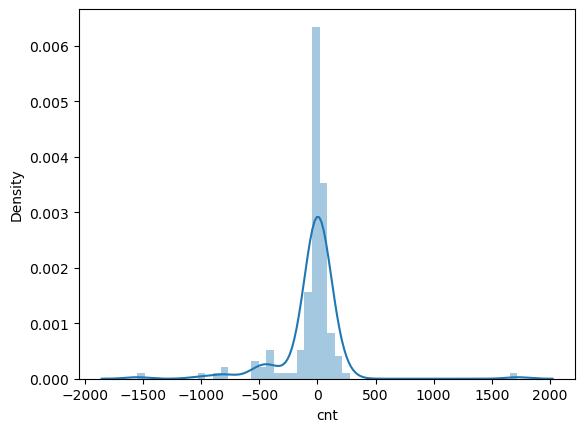

In [127]:
error = y_test - knn_pred  # check the error value
sns.distplot(error, kde=True)  # plot the  error value

**Conclusion**
* The KNeighborsRegressor model show the generalize model based on testing r2_score is 0.97 and training r2_score is 0.97.
* Error also show the normal distribution.
* KNeighborsRegressor model not required the Hyperparamater tuning.

## Model Comparition Report

In [165]:
# make a table for all algorithm's performance and error
score = pd.DataFrame({"Model":["Linear Regression","SVM","Decision Tree Regressor","Bagging",
                        "Random Forest Regressor","Gradient Boosting","XGB Regressor","AdaBoost Regressor","ANN",'KNN'],
                     "R2_score":[r2_1*100,r2_2*100,r2_3*100,r2_4*100,r2_5*100,r2_6*100,r2_7*100,r2_8*100,r2_9*100,r2_10*100],
                     "MSE":[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10],
                     "MAE":[mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10]})

In [166]:
score  # chcek the performance and error

Model   R2_score           MSE          MAE
0        Linear Regression  98.623297  4.580143e+04   143.402812
1                      SVM   8.067252  3.058504e+06  1410.276962
2  Decision Tree Regressor  98.479363  5.058997e+04   166.064274
3                  Bagging  99.272736  2.419529e+04   100.087075
4  Random Forest Regressor  99.484535  1.714896e+04    88.182245
5        Gradient Boosting  99.116620  2.938912e+04   123.291560
6            XGB Regressor  99.441459  1.858206e+04    94.974604
7       AdaBoost Regressor  95.854584  1.379136e+05   313.733215
8                      ANN  98.917232  3.602255e+04    92.942211
9                      KNN  97.682301  7.710739e+04   125.194558

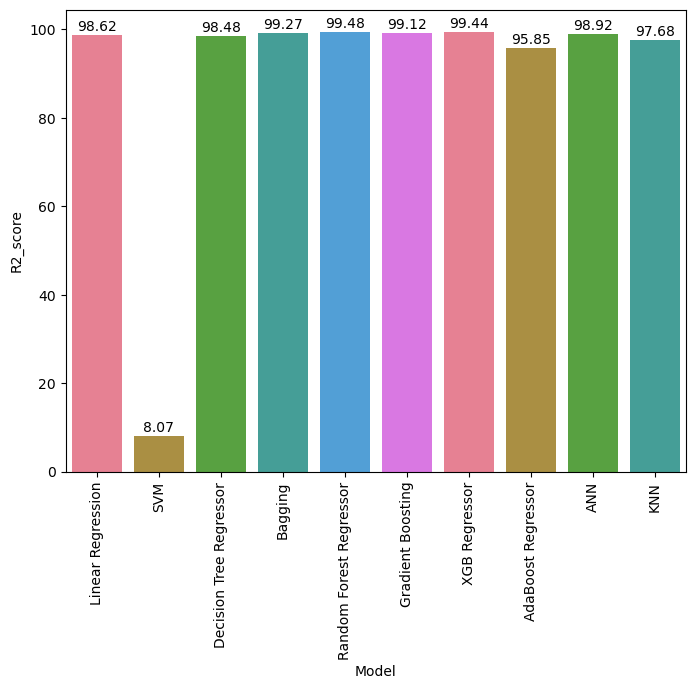

In [175]:
# use for All model performance show in barplot graph
palette = sns.color_palette("husl") # define the color for barplot 
plt.figure(figsize=(8, 6)) # define the plot size
plt.xticks(rotation = 90) # rotation x ticks
a = sns.barplot(x=score.Model, y=score.R2_score, data=score, palette=palette) # create the barplot

for index, value in enumerate(score['R2_score']): # show indivisual bar values show
    a.text(index, value + 1, f'{value:.2f}', ha='center')

### **Final Conclusion of Model Report**

* Best Algorithm is Random Forest Regressor  because high r2_score is 99.48 and Mean Absolute Error is 88.
* Most of the algorithms provide the r2_score is 97.50 plus.
* SVM algoritm provide only 8% r2_score and 1410 Mean Absolute Error.

## Report on challenges faced

* The analysis of the bike rental dataset reveals that it contains 731 entries and 16 columns, with 15 input features and 1 target variable.
* Among the columns, there are 4 float data types and 1 object type, while one column is incorrectly classified as an object instead of a datetime type.
* The dataset presents challenges due to the presence of multiple outliers across various columns and does not exhibit a normal distribution for all features.
* Additionally, the feature selection process identified strong relationships among several columns, leading to the decision to drop some of them.
* SVM algorithm gives less accuracy of model.
*  Overall, these insights highlight the importance of careful data preprocessing and model optimization in improving predictive performance.|

## Cross Validation Model :

In [169]:
from sklearn.model_selection import cross_val_score #import cross_val_score model

In [131]:
score = cross_val_score(rf,x,y,cv=5,scoring='r2')  #check the model performance by using cross validation
score

array([0.9834224 , 0.86493672, 0.94701935, 0.74785698, 0.96753568])

In [132]:
score.mean() # check the average of different model

0.9021542272874059

## Model Save

In [133]:
import pickle  #used for save the model

In [170]:
with open('bike.pkl','wb') as f : # save the file name
    pickle.dump(rf,f) #dump the rf model 

In [171]:
with open('bike.pkl','rb') as f : # call the file
    model = pickle.load(f)  # load the file

In [172]:
x.head()  # showing the first 5 row

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

        hum  windspeed  casual  registered  day  
0  0.805833   0.160446     331         654    1  
1  0.696087   0.248539     131         670    2  
2  0.437273   0.248309     120        1229    3  
3  0.590435   0.160296     108        1454    4  
4  0.436957   0.186900      82        1518    5

In [173]:
y.head()  # showing the first 5 row

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [174]:
# predict the data
prediction = model.predict([[1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,5]])
prediction

array([1602.785])